# Investigating the Ford GoBike System Data
## by Afnan AlRashoud

## Preliminary Wrangling

> The data set includes information about bike trips made using the system Ford GoBike.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date

%matplotlib inline

In [2]:
#Load data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#Overreview of the data
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


There's an outlier in the column `member_birth_year`, where the value is 1878.

### What is the structure of your dataset?

> The dataset consists of 16 columns and 183,412 rows. Each row contains info about a single bike trip and each column represents a single variable for the trip info. The dataset as whole is of bike trips data.

### What is/are the main feature(s) of interest in your dataset?
> We want to answer the following questions:
>* How many trips were made by Subscribers? How many were made by Customers?
>* What is the average trip duration for a Subscriber vs. Customer?
>* What is the average trip duration for a male vs. female?
>* Whats the most and least frequent stations bikers start their trips from?
>* Whats the most and least frequent stations bikers end their trips in?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Attributes `duration_sec`, `user_type`, `start_station`, `end_station` and `member gender` will help in answering our questions.

## Preparing Data

In [5]:
gobike = df.copy()

#### 1. Checking for duplicates

In [6]:
gobike.duplicated().sum()

0

Dataset does not have duplicated rows.

#### 2. Dropping Unnecassery Columns

In [7]:
cols = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
gobike.drop(columns= cols, inplace =True)

#### 2. Checking for nulls

In [8]:
gobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Since the number of null values in the `start_station` is the same as in `end_station`, we can assume they're of the same rows. The best method to deal with these rows is to drop them.

In [9]:
#Dropping nulls in start_station_id column
gobike.dropna(axis = 0, subset=['start_station_id'], inplace =True)
#Check if nulls in other columns were dropped too
gobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
end_station_id                0
end_station_name              0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [10]:
gobike.user_type.value_counts()

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64

In [11]:
gobike.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [12]:
#Dropping null values in columns member gender and member_birth_year
gobike.dropna(axis = 0, subset=['member_birth_year', 'member_gender'], inplace =True)
#Check if nulls in other columns were dropped too
gobike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### 4. Check data types

In [13]:
gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
end_station_id             float64
end_station_name            object
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

We'll change `member_birth_year` to an integer.

In [14]:
gobike['member_birth_year'] = gobike['member_birth_year'].astype(int)
print(gobike['member_birth_year'].dtype)
gobike['member_birth_year'].value_counts()

int64


1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1927        1
1878        1
1930        1
1928        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [15]:
#Creating a new column by calculating the user age
current_year = date.today().year
gobike['age'] = current_year - gobike['member_birth_year']
#Creating a function to assign each user to a group based on their age
def age_group(age):
    if age <= 17:
        return 'Kids'
    if age >= 18 and age <= 27:
        return 'Young Adults'
    if age <= 44:
        return 'Adults'
    if age <= 69:
        return 'Middle-Aged'
    if age >= 70:
        return 'Elderly'

gobike['age_group'] = gobike.age.apply(age_group)

gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_group
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,37,Adults
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,49,Middle-Aged
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,32,Adults
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,47,Middle-Aged
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,62,Middle-Aged


#### `age_group`,  `user_type` and `member_gender` should be changed to Categrical data type.

In [16]:
#According to code cell [10], there are only 2 types of users ['Subscriber', 'Customer']
cats = [['Subscriber', 'Customer'], ['Male', 'Female', 'Other'], ['Kids', 'Young Adults', 'Adults', 'Middle-Aged', 'Elderly']]
cols = ['user_type', 'member_gender', 'age_group']
for col in cols:
    i = cols.index(col)
    cat = pd.api.types.CategoricalDtype(cats[i], ordered =True)
    gobike[col] = gobike[col].astype(cat)
    print(col + ': ' , gobike[col].dtype)

user_type:  category
member_gender:  category
age_group:  category


## Univariate Exploration

#### 1. Member Birth Year

To make exploring the data easier, we've already created a new column by appointing each member to a group based on their age.

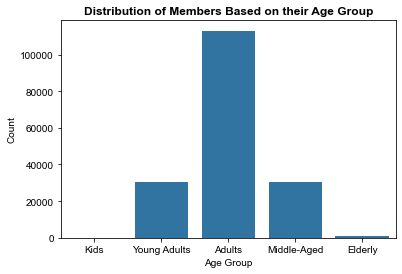

In [17]:
#We'll store the first color 'blue' of the seaborn color palette in a variable 'basic_color' to be used later multiple time
basic_color = sb.color_palette()[0]
sb.countplot(data = gobike, x = 'age_group', color = basic_color)
sb.set(rc={'figure.figsize':(8,8)})
plt.title('Distribution of Members Based on their Age Group', weight = 'bold')
plt.ylabel('Count')
plt.xlabel('Age Group');

>* The plot above shows that the majority of the trips were made by users aged between 18 and 27. On the other hand, none of the users belong the kids group.
>* We can investigate/compare these groups' genders or their trips duarion later.

#### 2. Start Station Name

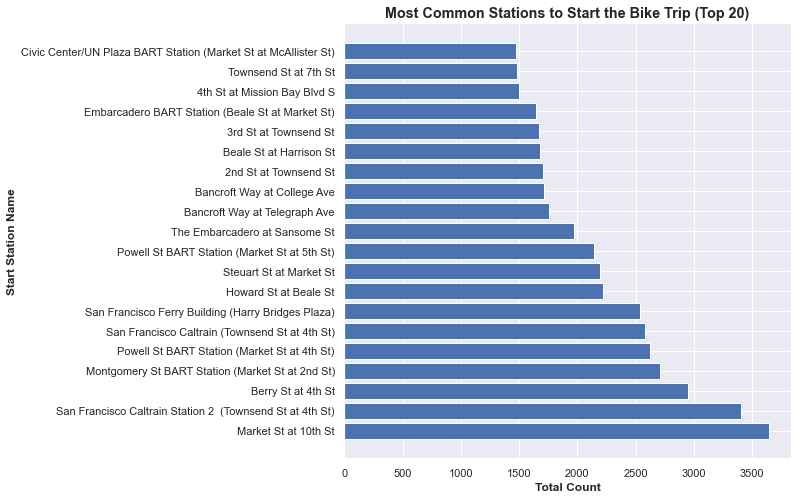

In [18]:
#Since there are huge numbers of stations in the original data set, we'll extrct only the top 20 stations
subset = gobike.groupby('start_station_name').count().sort_values('start_station_id', ascending=False)
top20start = subset.head(20).reset_index()
#Plotting the stations
plt.barh(top20start['start_station_name'], top20start['start_station_id'])
plt.title('Most Common Stations to Start the Bike Trip (Top 20)', weight = 'bold', size = 'large')
plt.ylabel('Start Station Name', weight = 'bold', size = 'medium')
plt.xlabel('Total Count', weight = 'bold', size = 'medium');

>* The most common station users like to start their trips at is the **Market St at 10th St**.
>* We can later investigate which of these stations is favored by each age group.

#### 3. End Station Name

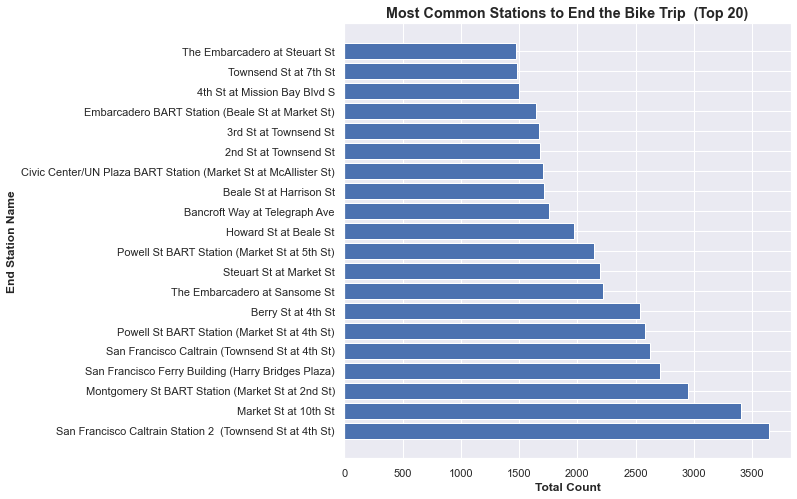

In [19]:
#Since there are huge numbers of stations in the original data set, we'll extrct only the top 20 stations
subset = gobike.groupby('end_station_name').count().sort_values('end_station_id', ascending=False)
top20end = subset.head(20).reset_index()
#Plotting the stations
plt.barh(top20end['end_station_name'], top20start['end_station_id'])
plt.title('Most Common Stations to End the Bike Trip  (Top 20)', weight = 'bold', size = 'large')
plt.ylabel('End Station Name', weight = 'bold', size = 'medium')
plt.xlabel('Total Count', weight = 'bold', size = 'medium');

>* The most common station users like to end their trips at is the **San Francisco Caltrain 2 (Tpwnsend St at 4th St)**.
>* We can later investigate which of these stations is favored by each age group or by each gender.

#### 4. Gender

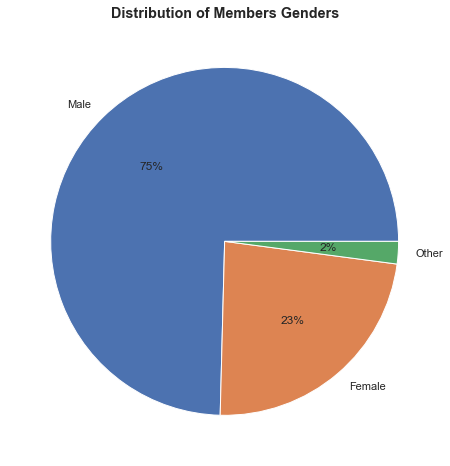

In [20]:
genders = gobike.member_gender.value_counts()
plt.pie(x = genders.values, labels = genders.index, autopct = '%.f%%')
plt.title('Distribution of Members Genders',  weight = 'bold', size = 'large');

>* The pie chart above show that there's a huge difference between the number trips made by Male users vs Female users (%75 to %23)!
>* We will later divide each gender based on the user's age to investigate more.

#### 5. User Type

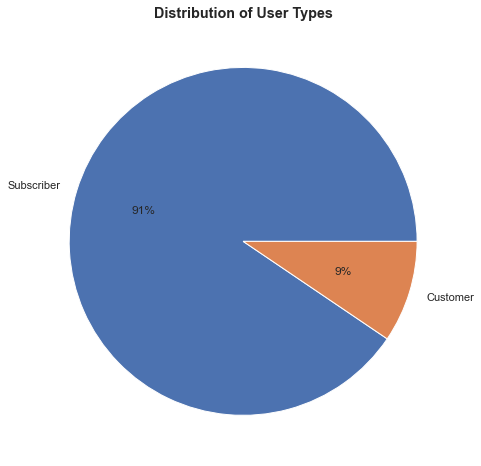

In [21]:
user_types = gobike.user_type.value_counts()
plt.pie(x = user_types.values, labels = user_types.index, autopct = '%.f%%')
plt.title('Distribution of User Types',  weight = 'bold', size = 'large');

>* The majority of the trips were made by users who are subscriber, with %91 of users are subscribers while only %9 are customers.
>* We'll look into the average trip duration for each group later.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>* There's a huge difference between the usesr's genders, with GoBike having a high popularity among males. We also noticed it's popular among adults aged between 27 and 44. On the other hand, none of these users are aged 17 and below.
>* In order to make our explration easier and to focus more on our investigations, we had to add another column to the data set by calculating the user's ages from their date of birth then assigning each user to an age group.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>* The attribute `member_birth_year` was created as a float, which is incorrect since can never have a year of 1995.5 for example. We converted the column to an integer since we needed it to extract the user's age.
>* The data set was not tidy by having columns that should have been in another data set dedicated to `stations`. Thus we dropped the following columns from our dataset: `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`.

## Bivariate Exploration

> In this section, we'll investigate relationships between pairs of variables in our
data.

#### 1. Age Group vs Trip Duration

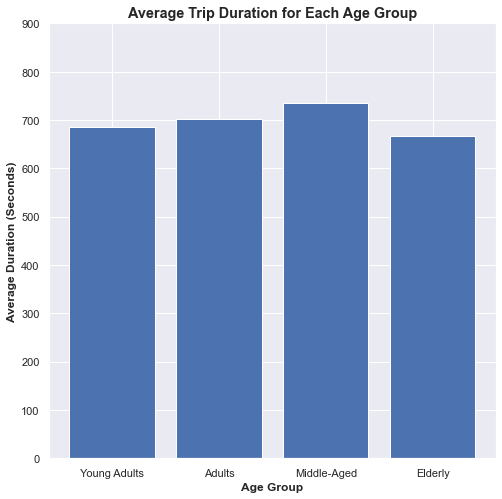

In [22]:
avg_duration_age = gobike.groupby('age_group').mean().reset_index()
#We'll use a bar chart beacaue age_group is nominal and duaration_sec is numeric
plt.bar(data = avg_duration_age, x = 'age_group', height = 'duration_sec')
plt.title('Average Trip Duration for Each Age Group', weight = 'bold', size = 'large')
plt.ylabel('Average Duration (Seconds)', weight = 'bold')
plt.xlabel('Age Group', weight = 'bold')
plt.ylim(0,900);

> On average, middle-Aged people spend the most on their bike trips with an average of more than 700 seconds. On the other hand, Elderly people spend the least with average duration of 650 seconds.

#### 2. Age vs Trip Duraion

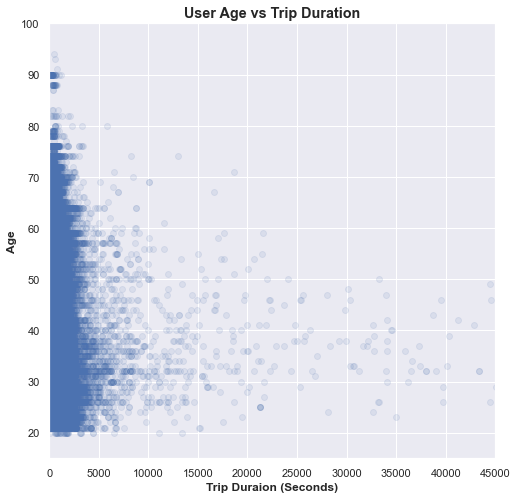

In [23]:
#Since both features are numeric, we'll use a scatter plot
plt.scatter(data = gobike, y = 'age', x = 'duration_sec', alpha = 1/10)
#We'll remove the outliers from the plot by setting a limit for the x-axis (age axis)
plt.ylim(15, 100)
#Since any duration above 50k means the user used the bike for more 12 hours, we'll set the y-axis limit 45k seconds
plt.xlim(0, 45000)

plt.title('User Age vs Trip Duration', weight = 'bold', size = 'large')
plt.ylabel('Age', weight = 'bold')
plt.xlabel('Trip Duraion (Seconds)', weight = 'bold');

> For people aged 60 and more, most of the trips lasted less than 5000 seconds. For people aged between 20 and 50, most of their trips lasted less than 10k seconds, with few outlier that lasted more than 10k seconds.

#### 3. Gender vs Trip Duration

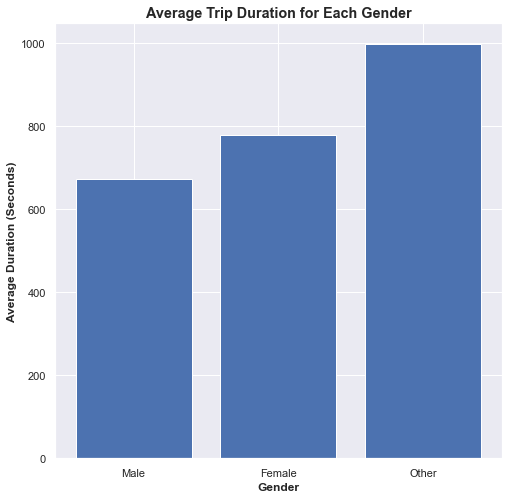

In [24]:
avg_duration_gender = gobike.groupby('member_gender').mean().reset_index()
#We'll use a bar chart beacaue age_group is nominal and duaration_sec is numeric
plt.bar(data = avg_duration_gender, x = 'member_gender', height = 'duration_sec')
plt.title('Average Trip Duration for Each Gender', weight = 'bold', size = 'large')
plt.ylabel('Average Duration (Seconds)', weight = 'bold')
plt.xlabel('Gender', weight = 'bold');

> On average, trips made by female users last more than the ones made by male users.

#### 4. User Type vs Trip Duration

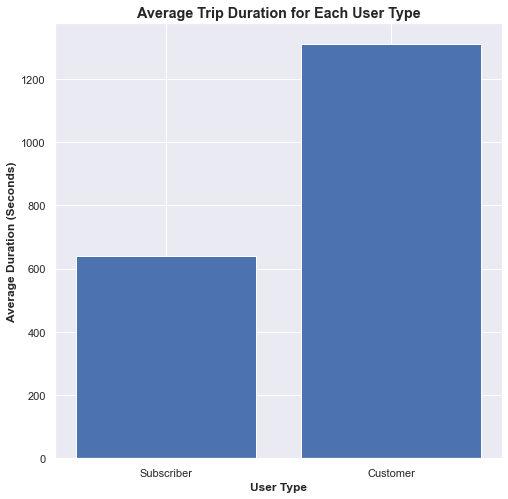

In [25]:
avg_duration_type = gobike.groupby('user_type').mean().reset_index()
#We'll use a bar chart beacaue age_group is nominal and duaration_sec is numeric
plt.bar(data = avg_duration_type, x = 'user_type', height = 'duration_sec')
plt.title('Average Trip Duration for Each User Type', weight = 'bold', size = 'large')
plt.ylabel('Average Duration (Seconds)', weight = 'bold')
plt.xlabel('User Type', weight = 'bold');

> On average, trips made by customers last more than the ones made by subribers.

#### 5. Age Group vs Gender

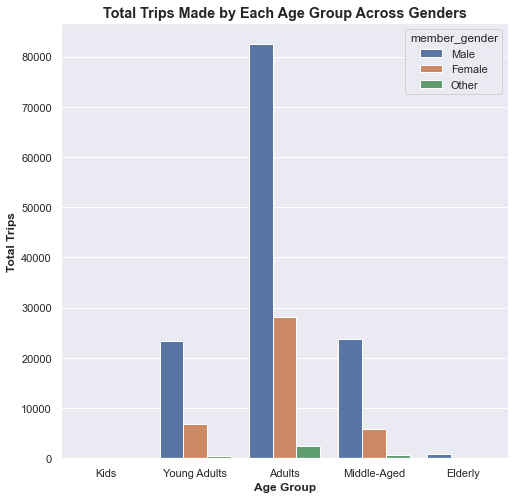

In [26]:
sb.countplot(data = gobike, x = 'age_group', hue = 'member_gender')
plt.title('Total Trips Made by Each Age Group Across Genders', weight = 'bold', size = 'large')
plt.xlabel('Age Group', weight = 'bold')
plt.ylabel('Total Trips', weight = 'bold');

>* The majority of the trips made across all age groups belongs to male users.
>* The majority of trips made by female users were made by adults.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>* When observing the average trip duration between genders, females spend more time compared to males.
>* When observing the average trip duration between users, customers spend more time compared to subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although the number of trips made male exceeds the one made female (by a huge difference!), we notice the average trip duration among female trips last more. Same observation has been noted when comparing the cutomers ans subscribers.

## Multivariate Exploration

> We'll create plots of three or more variables to investigate our data even
further.

#### 1. Gender, Age Group and Trip Duration

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


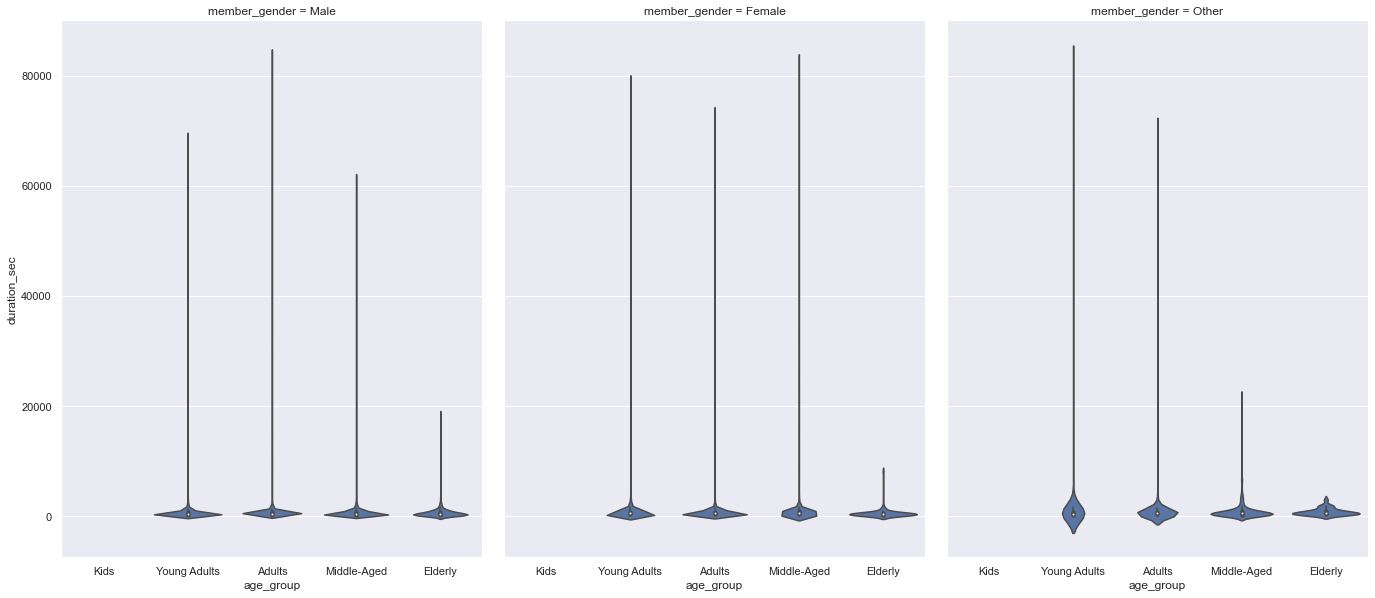

In [27]:
g = sb.FacetGrid(data = gobike, col = 'member_gender', size = 4)
g.map(sb.violinplot, 'age_group', 'duration_sec')
g.fig.set_size_inches(20,10);

> There are many outliers exceeding the majority of trip duration across all age groups and all genders, except for the elderly age group.

#### 2. Gender, Age Group, User Type and Total Trips

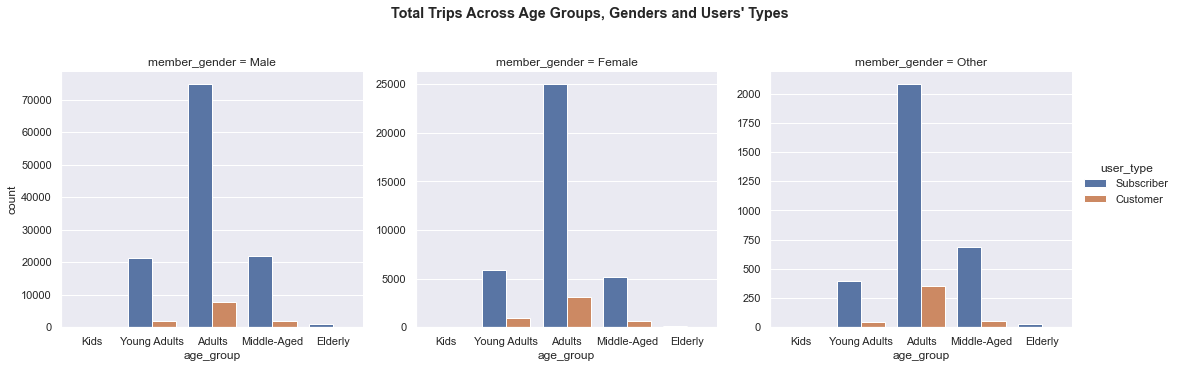

In [32]:
ax = sb.catplot(data=gobike, x='age_group', col='member_gender',hue='user_type', kind='count', sharey=False)
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle("Total Trips Across Age Groups, Genders and Users' Types", weight = 'bold', size = 'large');

> Across all age groups and all genders, the total numbers made by subscribers are higher than the one made by customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In univariate observation, we noticed that the total numbers made by subscribers were higher by a huge percentage than customers' total trip. This observation is still the same even after dividing these two groups based on their genders and age.

### Were there any interesting or surprising interactions between features?

> We noticed that none of the trips were made by elderly females (older than 69). Also, none of the trips records a user who is aged 17 or less.

In [29]:
gobike.to_csv('gobike.csv', index = False)